# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


In [3]:
# just testing out url calls

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" # imperial = Farenheit or metric = celcius

city = "Bujumbura"
#query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units


base_url = f"{url}&format=json&apiKey={weather_api_key}&units={units}"
base_url
#api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=55196b1244cd26380650a244fea590f6
city_url = f"{base_url}&q={city}"
city_url

'http://api.openweathermap.org/data/2.5/weather?&format=json&apiKey=55196b1244cd26380650a244fea590f6&units=imperial&q=Bujumbura'

In [4]:
#just used for testing
city_weather = requests.get(city_url).json()
print(json.dumps(city_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -3.3822,
        "lon": 29.3644
    },
    "dt": 1706545234,
    "id": 425378,
    "main": {
        "feels_like": 76.6,
        "grnd_level": 925,
        "humidity": 86,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 75.33,
        "temp_max": 75.33,
        "temp_min": 75.33
    },
    "name": "Bujumbura",
    "rain": {
        "1h": 1.08
    },
    "sys": {
        "country": "BI",
        "sunrise": 1706501250,
        "sunset": 1706545402
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 189,
        "gust": 9.73,
        "speed": 6.17
    }
}


In [5]:
#just used to confirm fields
city_weather["main"]["temp_max"]
city_weather["wind"]["speed"]
city_weather["sys"]["country"]
city_weather["dt"]

1706545234

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric" # imperial = Farenheit or metric = celcius


#query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units


base_url = f"{url}&format=json&apiKey={weather_api_key}&units={units}"
base_url
#url = # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | sarkand
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | nejo
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | kerikeri
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | ciudad lazaro cardenas
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | humaita
Processing Record 22 of Set 1 | bethel
Processing 

Processing Record 42 of Set 4 | chaplynka
Processing Record 43 of Set 4 | ola
Processing Record 44 of Set 4 | bubaque
Processing Record 45 of Set 4 | utrik
Processing Record 46 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 47 of Set 4 | valley city
Processing Record 48 of Set 4 | enewetak
Processing Record 49 of Set 4 | pagar alam
Processing Record 0 of Set 5 | jayapura
Processing Record 1 of Set 5 | palmer
Processing Record 2 of Set 5 | constantia
Processing Record 3 of Set 5 | sann
Processing Record 4 of Set 5 | queenstown
Processing Record 5 of Set 5 | morley
Processing Record 6 of Set 5 | langzhong
Processing Record 7 of Set 5 | gobabis
Processing Record 8 of Set 5 | rabaul
Processing Record 9 of Set 5 | uturoa
Processing Record 10 of Set 5 | nar'yan-mar
Processing Record 11 of Set 5 | guanajuato
Processing Record 12 of Set 5 | punta arenas
Processing Record 13 of Set 5 | anadyr
Processing Record 14 of Set 5 | saint-leu
Processing Record 15 of Set 5 | ivdel'
Pr

Processing Record 32 of Set 8 | vila franca do campo
Processing Record 33 of Set 8 | port louis
Processing Record 34 of Set 8 | adrogue
City not found. Skipping...
Processing Record 35 of Set 8 | arenapolis
Processing Record 36 of Set 8 | lubsko
Processing Record 37 of Set 8 | kailua-kona
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | salta
Processing Record 40 of Set 8 | kone
Processing Record 41 of Set 8 | mansa
Processing Record 42 of Set 8 | tongouson
Processing Record 43 of Set 8 | linxia chengguanzhen
Processing Record 44 of Set 8 | weyburn
Processing Record 45 of Set 8 | sibolga
Processing Record 46 of Set 8 | kirensk
Processing Record 47 of Set 8 | hilo
Processing Record 48 of Set 8 | la'ie
Processing Record 49 of Set 8 | yagry
City not found. Skipping...
Processing Record 0 of Set 9 | udaipura
Processing Record 1 of Set 9 | geraldton
Processing Record 2 of Set 9 | poso
Processing Record 3 of Set 9 | slavgorod
Processing Record 4 of Set 9 | boyolangu


Processing Record 24 of Set 12 | saransk
Processing Record 25 of Set 12 | ahau
City not found. Skipping...
Processing Record 26 of Set 12 | myskhako
Processing Record 27 of Set 12 | tobi village
City not found. Skipping...
Processing Record 28 of Set 12 | maun
Processing Record 29 of Set 12 | seryshevo
Processing Record 30 of Set 12 | azhikkal
Processing Record 31 of Set 12 | deir ez-zor
Processing Record 32 of Set 12 | roma
Processing Record 33 of Set 12 | espargos
City not found. Skipping...
Processing Record 34 of Set 12 | dawson creek
Processing Record 35 of Set 12 | januaria
Processing Record 36 of Set 12 | mata-utu
Processing Record 37 of Set 12 | whangarei
Processing Record 38 of Set 12 | damongo
City not found. Skipping...
Processing Record 39 of Set 12 | noumea
Processing Record 40 of Set 12 | ad dawadimi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,3.43,87,100,7.72,CA,1706545203
1,talnakh,69.4865,88.3972,-14.33,90,100,3.93,RU,1706545235
2,cabo san lucas,22.8909,-109.9124,25.98,51,40,1.03,MX,1706545177
3,sarkand,45.4100,79.9186,-7.69,84,100,2.00,KZ,1706545236
4,invercargill,-46.4000,168.3500,13.34,88,90,1.80,NZ,1706544966


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,3.43,87,100,7.72,CA,1706545203
1,talnakh,69.4865,88.3972,-14.33,90,100,3.93,RU,1706545235
2,cabo san lucas,22.8909,-109.9124,25.98,51,40,1.03,MX,1706545177
3,sarkand,45.4100,79.9186,-7.69,84,100,2.00,KZ,1706545236
4,invercargill,-46.4000,168.3500,13.34,88,90,1.80,NZ,1706544966


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

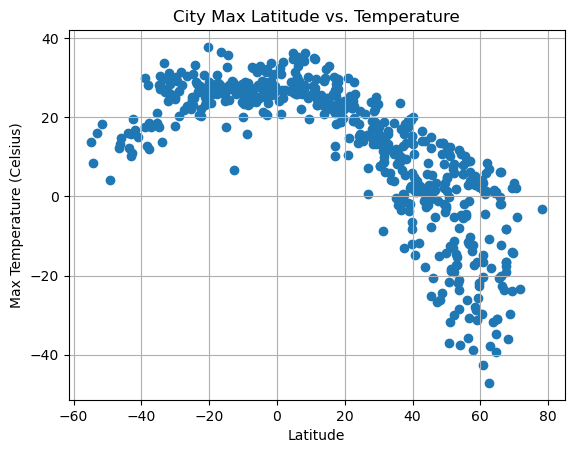

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

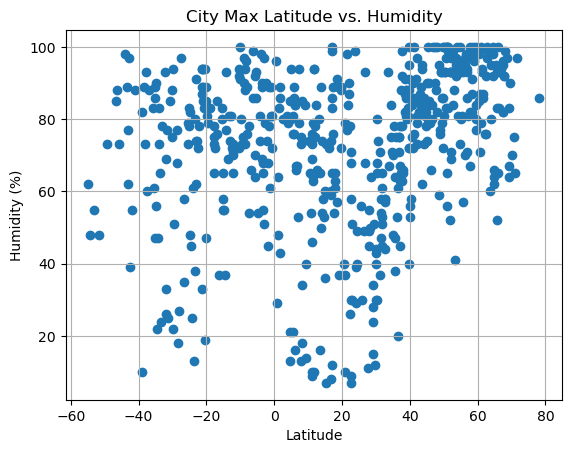

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

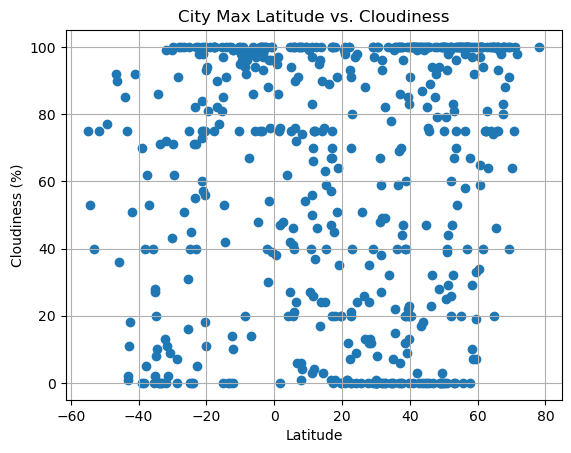

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

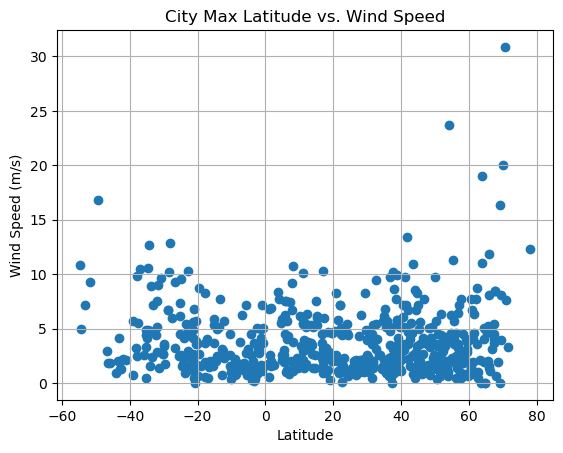

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def calcLinearRegression(x_value, y_value):
    #x_string = print(f"{dataframe}['{x_value}']")
    x_values =  x_value
    y_values = y_value

    plotx = min(x_value) + 10
    ploty = min(y_value)
    
    #print(plotx)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #print(line_eq)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(plotx,ploty),fontsize=15,color="red")
    print(f"The r value is: {rvalue**2}")  #  should this be plain rvalue????? SHANNON CHECK THIS ONE?
    #return line_eq

    


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,3.43,87,100,7.72,CA,1706545203
1,talnakh,69.4865,88.3972,-14.33,90,100,3.93,RU,1706545235
2,cabo san lucas,22.8909,-109.9124,25.98,51,40,1.03,MX,1706545177
3,sarkand,45.4100,79.9186,-7.69,84,100,2.00,KZ,1706545236
6,iqaluit,63.7506,-68.5145,-31.84,60,100,0.00,CA,1706545237


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,invercargill,-46.4000,168.3500,13.34,88,90,1.80,NZ,1706544966
5,adamstown,-25.0660,-130.1015,24.36,78,100,4.51,PN,1706545236
8,waitangi,-43.9535,-176.5597,16.01,98,85,0.89,NZ,1706545237
11,kerikeri,-35.2268,173.9474,17.73,89,2,0.45,NZ,1706545238
12,margaret river,-33.9500,115.0667,13.81,83,0,4.75,AU,1706545239


###  Temperature vs. Latitude Linear Regression Plot

The r value is: 0.6616830594098994


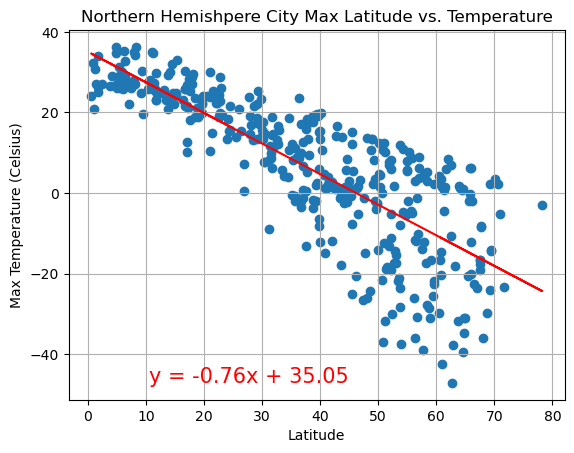

In [18]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Max Temp']
#calcLinearRegression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
calcLinearRegression(x_value, y_value)


plt.scatter(x_value, y_value, marker="o")  # could move this to the function

# Incorporate the other graph properties
plt.title("Northern Hemishpere City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()



The r value is: 0.29695172068023307


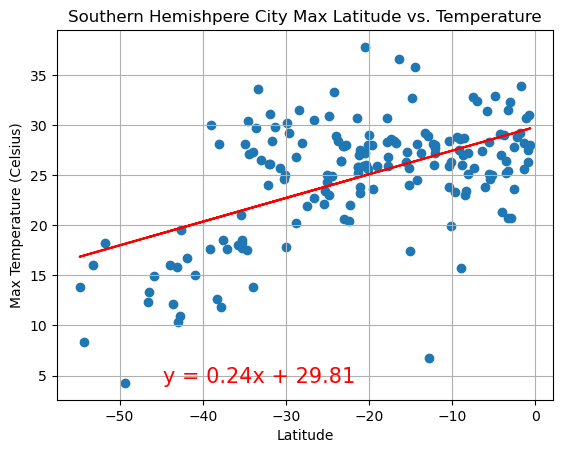

In [19]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']
#calcLinearRegression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
calcLinearRegression(x_value, y_value)


plt.scatter(x_value, y_value, marker="o")  # could move this to the function

# Incorporate the other graph properties
plt.title("Southern Hemishpere City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

**Discussion about the linear relationship:** 
There is a higher correlation in the Northern Hemisphere between Latitude and Max Temperature
The correlation is much weaker in the Soutern Hemisphere between Latitude and Max Temperature


### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.21060920783939913


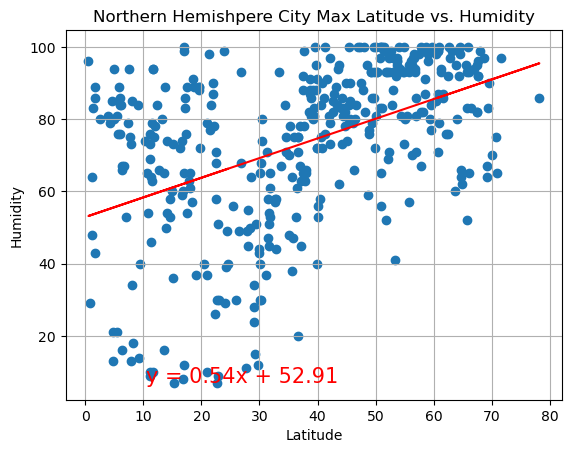

In [20]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
#calcLinearRegression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
calcLinearRegression(x_value, y_value)


plt.scatter(x_value, y_value, marker="o")  # could move this to the function

# Incorporate the other graph properties
plt.title("Northern Hemishpere City Max Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

The r value is: 0.04484799010685316


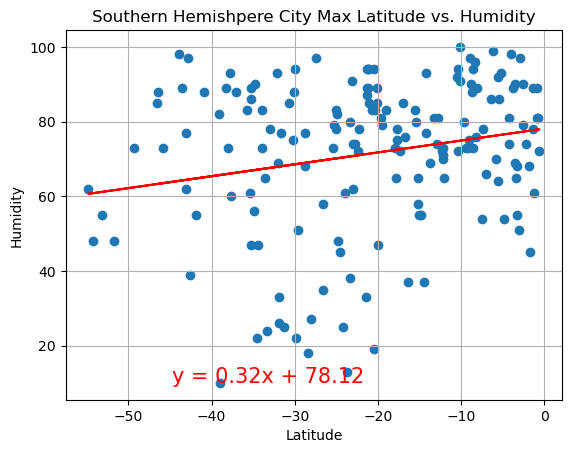

In [21]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
#calcLinearRegression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
calcLinearRegression(x_value, y_value)


plt.scatter(x_value, y_value, marker="o")  # could move this to the function

# Incorporate the other graph properties
plt.title("Southern Hemishpere City Max Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

**Discussion about the linear relationship:** 
Neither Hemisphere has a strong correlation between Latitude and Humidity.  The Northern Hemispere does a stronger correlation between Latitude and Humidity, while the Southern Hemisphere has virtually no correlation.


### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.0503172921716828


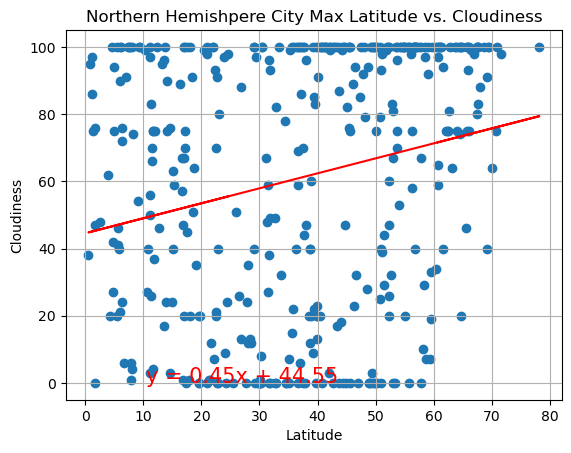

In [22]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
#calcLinearRegression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
calcLinearRegression(x_value, y_value)


plt.scatter(x_value, y_value, marker="o")  # could move this to the function

# Incorporate the other graph properties
plt.title("Northern Hemishpere City Max Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

The r value is: 0.17420131530668947


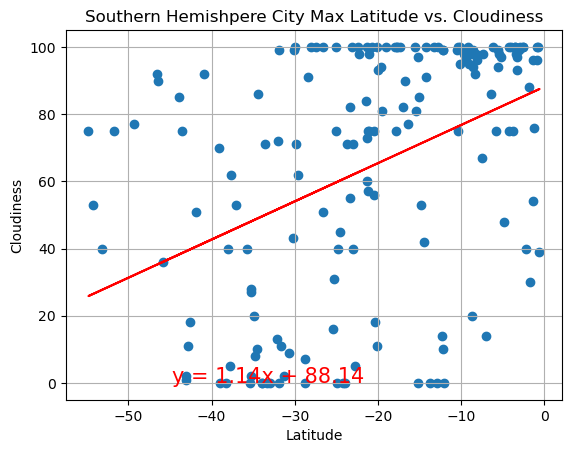

In [23]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']
#calcLinearRegression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
calcLinearRegression(x_value, y_value)


plt.scatter(x_value, y_value, marker="o")  # could move this to the function

# Incorporate the other graph properties
plt.title("Southern Hemishpere City Max Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.013195909864685615


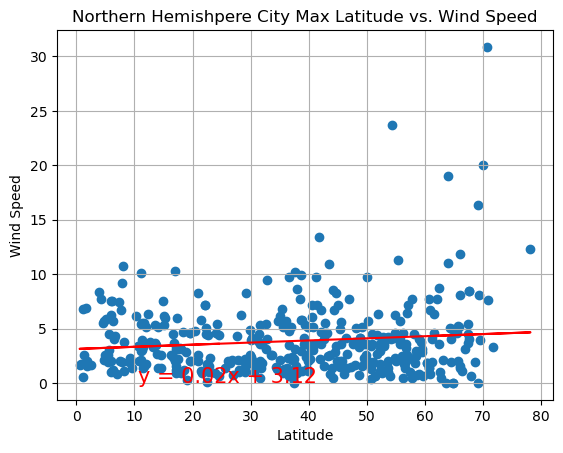

In [24]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
#calcLinearRegression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
calcLinearRegression(x_value, y_value)


plt.scatter(x_value, y_value, marker="o")  # could move this to the function

# Incorporate the other graph properties
plt.title("Northern Hemishpere City Max Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

The r value is: 0.12879813675468701


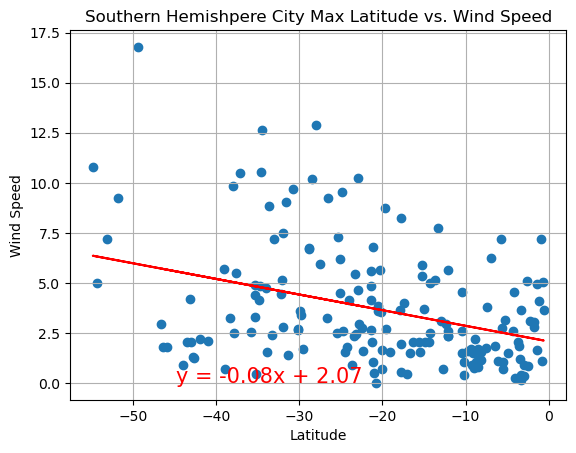

In [25]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']
#calcLinearRegression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
calcLinearRegression(x_value, y_value)


plt.scatter(x_value, y_value, marker="o")  # could move this to the function

# Incorporate the other graph properties
plt.title("Southern Hemishpere City Max Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

**Discussion about the linear relationship:** 
There is no real correlation between Latitude and Wind Speed in either Hemisphere